In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
61,25,87000,0
262,55,125000,1
332,42,65000,0
37,30,49000,0
28,29,43000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [6]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
scaler.var_

array([1.04038724e+02, 1.19572709e+09])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [12]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,0,1
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect after scaling

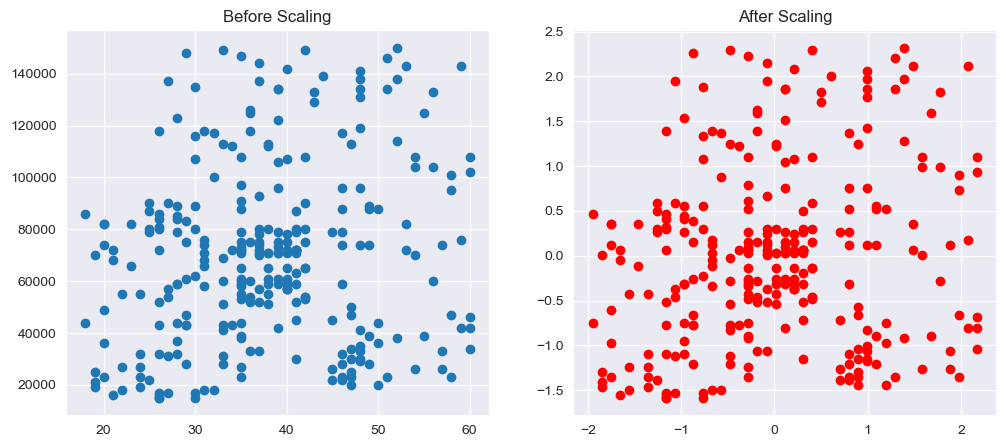

In [17]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled.iloc[:,0],X_train_scaled.iloc[:,1],color='red')
ax2.set_title("After Scaling")
plt.show()

# Why Scaling in important

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)

In [27]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('Ater Scaling Accuracy Score : ',accuracy_score(y_test,y_pred_scaled))

Accuracy Score :  0.6583333333333333
Ater Scaling Accuracy Score :  0.8666666666666667
